In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [4]:
# Load Data
data = pd.read_csv("/content/compresive_strength_concrete.txt")
data.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [ ]:
data.shape

(1030, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [8]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

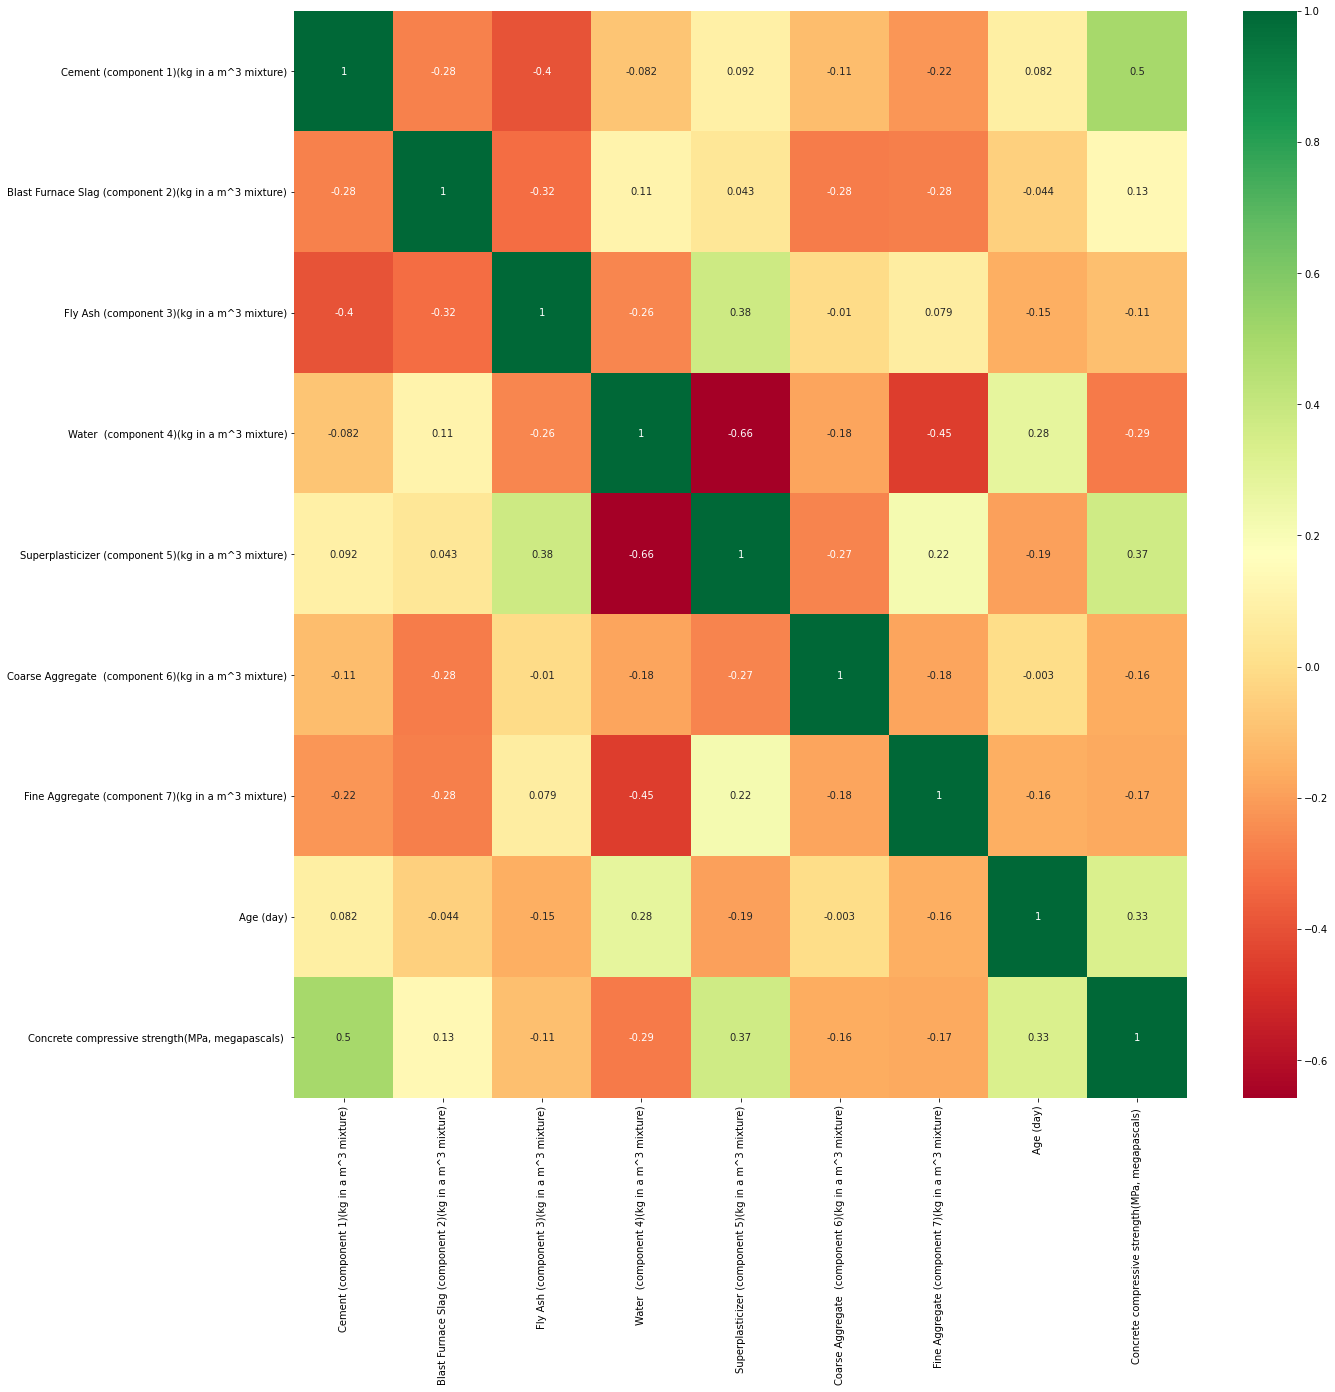

In [10]:
correlation=data.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
a=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
data1=data[['Cement (component 1)(kg in a m^3 mixture)','Superplasticizer (component 5)(kg in a m^3 mixture)','Age (day)','Concrete compressive strength(MPa, megapascals) ']]
data1.head(3)

,Cement (component 1)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,2.5,28,79.99
1,540.0,2.5,28,61.89
2,332.5,0.0,270,40.27


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


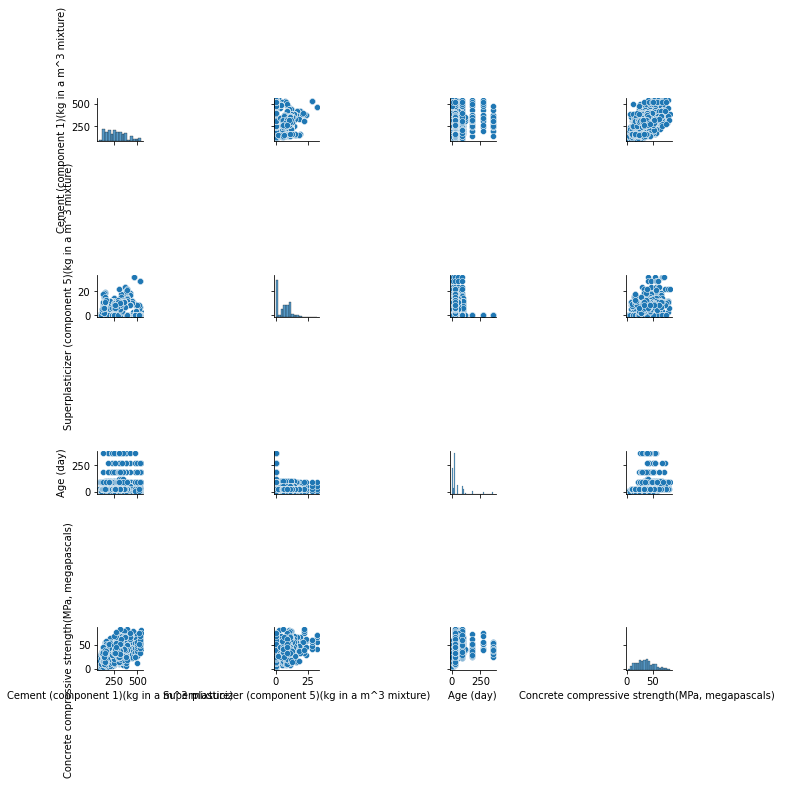

In [12]:
b=sns.pairplot(data1)
b

In [13]:
#Normalizing the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
cement_data= scaler.fit_transform(data1)

In [14]:
# standardized data between (1 to 0)
print("min:",cement_data.min(axis=0))
print("max:",cement_data.max(axis=0))

min: [0. 0. 0. 0.]
max: [1. 1. 1. 1.]


In [21]:
data2=pd.DataFrame(cement_data,columns=[['Cement (component 1)(kg in a m^3 mixture)','Superplasticizer (component 5)(kg in a m^3 mixture)','Age (day)','Concrete compressive strength(MPa, megapascals) ']])
data2.head(4)

,Cement (component 1)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1.000000,0.07764,0.074176,0.967485
1,1.000000,0.07764,0.074176,0.741996
2,0.526256,0.00000,0.739011,0.472655
3,0.526256,0.00000,1.000000,0.482372


In [23]:
# Split Data
X=data2[['Cement (component 1)(kg in a m^3 mixture)','Superplasticizer (component 5)(kg in a m^3 mixture)','Age (day)']]
Y=data2[['Concrete compressive strength(MPa, megapascals) ']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=54)

In [24]:
X_train

,Cement (component 1)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Age (day)
1029,0.362785,0.267081,0.074176
919,0.481735,0.248447,0.074176
150,0.494977,0.444099,0.151099
352,0.254566,0.363354,0.151099
923,0.136986,0.310559,0.074176
...,...,...,...
542,0.349315,0.000000,0.244505
708,0.031963,0.000000,0.005495
617,0.347032,0.000000,0.005495
17,0.547945,0.000000,1.000000


In [27]:
model = Sequential()
model.add(tf.keras.layers.Dense(10, activation='relu',input_shape=(3,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])

In [28]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 1ms/step - loss: 0.0498 - mae: 0.1848
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0473 - mae: 0.1799
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0466 - mae: 0.1782
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0449 - mae: 0.1754
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0385 - mae: 0.1622
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0373 - mae: 0.1582
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0351 - mae: 0.1542
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0330 - mae: 0.1485
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0312 - mae: 0.1440
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0291 - mae: 0.1393
Epoch 11/100
23/23 [==============================] - 0s 1m

In [29]:
Prediction=model.predict(X_test)
print(Prediction.shape)
print(Prediction)

(309, 1)
[[0.2881925 ]
 [0.52453357]
 [0.3042719 ]
 [0.36065346]
 [0.5737322 ]
 [0.17138031]
 [0.14818195]
 [0.30941796]
 [0.9374671 ]
 [0.28649828]
 [0.27272406]
 [0.17729941]
 [0.28881228]
 [0.73801994]
 [0.13881406]
 [0.22069123]
 [0.5991542 ]
 [0.30038837]
 [0.27981886]
 [0.39066797]
 [0.3084607 ]
 [0.15291193]
 [0.46553192]
 [0.2245337 ]
 [0.163715  ]
 [0.15726402]
 [0.12502956]
 [0.45734793]
 [0.5393021 ]
 [0.41126016]
 [0.30266201]
 [0.47479162]
 [0.5493664 ]
 [0.5906432 ]
 [0.33233613]
 [0.8156997 ]
 [0.5171407 ]
 [0.6322273 ]
 [0.33619162]
 [0.5530683 ]
 [0.5016334 ]
 [0.43601605]
 [0.4817646 ]
 [0.43108904]
 [0.70266944]
 [0.6980793 ]
 [0.5212434 ]
 [0.30713454]
 [0.3110761 ]
 [0.43246424]
 [0.2921787 ]
 [0.55900943]
 [0.4829507 ]
 [0.31361282]
 [0.61739093]
 [0.36072242]
 [0.2873789 ]
 [0.53433377]
 [0.5829202 ]
 [0.3146178 ]
 [0.3604124 ]
 [0.5235784 ]
 [0.34154683]
 [0.47086787]
 [0.30388314]
 [0.43520856]
 [0.59491587]
 [0.27672315]
 [0.6816062 ]
 [0.40093353]
 [0.5991542